In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Text-Processing and Data Clustering
# 1. Transform text data into numerical vectors
# 2. Group or cluster the data samples we have

In [3]:
# Can obtain Bag-of-words in sklearn

In [4]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

sentences = ['This is the first sentence.',
             'This one is the second sentence.',
             'And this is the third one.',
             'Is this the first sentence?']

In [5]:
vectorizer = CountVectorizer()
# create a term-document matrix: assign each word a tuple: 
# first number is the sentence, and the second is the unique number that corresponds to the word
# for example, if the word "one" is assigned the number 3,
# then the word "one" that is used in the third sentence is represented by the tuple (2,3)
X = vectorizer.fit_transform(sentences)

# from the term-document matrix, create the BoW matrix
print(X.toarray())

[[0 1 1 0 0 1 1 0 1]
 [0 0 1 1 1 1 1 0 1]
 [1 0 1 1 0 0 1 1 1]
 [0 1 1 0 0 1 1 0 1]]


In [6]:
vectorizer.get_feature_names()

['and', 'first', 'is', 'one', 'second', 'sentence', 'the', 'third', 'this']

In [7]:
sentences_1 = ['Data Science is the best.',
               'Data Science has cool topics.', 
               'Are these the best topics?',
               'Is Data Science the best track?']

In [9]:
X = vectorizer.fit_transform(sentences_1)

In [15]:
# Rows are the sentences, columns are the unique words

In [12]:
print(X.shape)
print(X.toarray())

(4, 11)
[[0 1 0 1 0 1 1 1 0 0 0]
 [0 0 1 1 1 0 1 0 0 1 0]
 [1 1 0 0 0 0 0 1 1 1 0]
 [0 1 0 1 0 1 1 1 0 0 1]]


In [14]:
print(vectorizer.get_feature_names())

['are', 'best', 'cool', 'data', 'has', 'is', 'science', 'the', 'these', 'topics', 'track']


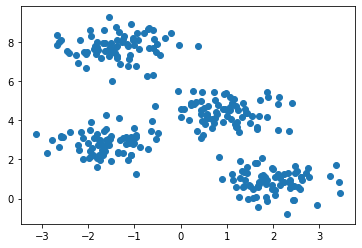

In [20]:
from sklearn.datasets.samples_generator import make_blobs
import matplotlib.pyplot as plt

# create a sample dataset with 300 data points and 4 cluster centers
X, y = make_blobs(n_samples=300, centers=4,
                          random_state=0, cluster_std=0.60)

# plot the data
_= plt.scatter(X[:, 0], X[:, 1])

In [21]:
from sklearn.cluster import KMeans

# k-means algorithm where k = 4
km = KMeans(n_clusters=4)
# perform k-means clustering on the previous dataset
km.fit(X)
# print the 4 cluster centers
print(km.cluster_centers_)

[[-1.58438467  2.83081263]
 [-1.37324398  7.75368871]
 [ 0.94973532  4.41906906]
 [ 1.98258281  0.86771314]]


In [38]:
u = np.array([1,1])
v = np.array([2,2])
z = np.array([3,8])

In [39]:
np.linalg.norm(z-u)

7.280109889280518

In [40]:
# Distortion

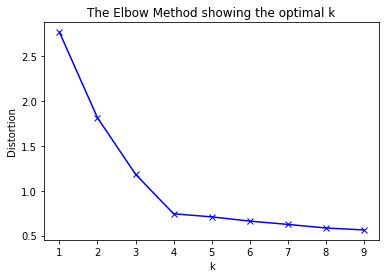

In [44]:
import numpy as np
from scipy.spatial import distance

distortions = []
K = range(1, 10)
for k in K:
    # fit the k-means for a given k to the data (X)
    km = KMeans(n_clusters=k)
    km.fit(X)
    # distance.cdist finds the squared distances
    # axis=1 allows us to keep the min for each sample, not jsut the min across the entire dataset
    # find the closest distance for each sample to a center, and take the average
    distortions.append(sum(np.min(distance.cdist(X, km.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])

# Plot the elbow: bx- = use a solid (-) blue (b) line, 
# and mark the x-axis points with an x (x)
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
_= plt.title('The Elbow Method showing the optimal k')

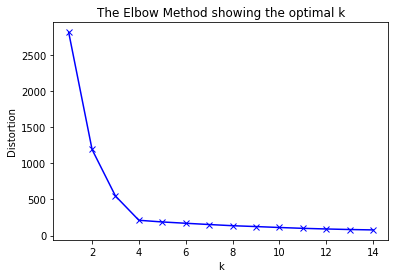

In [45]:

sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km.fit(X)
    # inertia is an attribute of km!
    # https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans
    sum_of_squared_distances.append(km.inertia_)
    

    # Plot the elbow
plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [46]:
# What is the optimal K for given data sample?

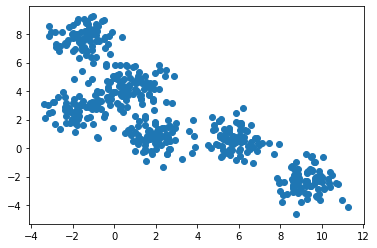

In [47]:
from sklearn.datasets.samples_generator import make_blobs
import matplotlib.pyplot as plt

Data, blob_y = make_blobs(n_samples=500, centers=6,
                          random_state=0, cluster_std=0.80)

# plot the data
plt.scatter(Data[:, 0], Data[:, 1])

In [52]:
X = Data

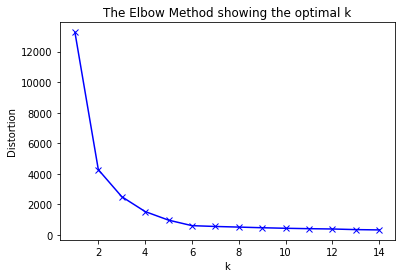

In [53]:
sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km.fit(X)
    # inertia is an attribute of km!
    # https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans
    sum_of_squared_distances.append(km.inertia_)
    

    # Plot the elbow
plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

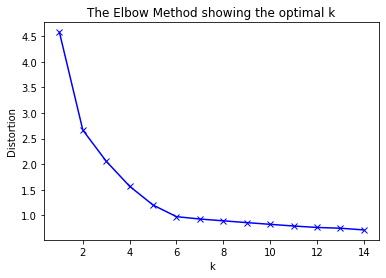

In [55]:
import numpy as np
from scipy.spatial import distance

distortions = []
K = range(1, 15)
for k in K:
    # fit the k-means for a given k to the data (X)
    km = KMeans(n_clusters=k)
    km.fit(X)
    # distance.cdist finds the squared distances
    # axis=1 allows us to keep the min for each sample, not jsut the min across the entire dataset
    # find the closest distance for each sample to a center, and take the average
    distortions.append(sum(np.min(distance.cdist(X, km.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])

# Plot the elbow: bx- = use a solid (-) blue (b) line, 
# and mark the x-axis points with an x (x)
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
_= plt.title('The Elbow Method showing the optimal k')

In [56]:
# how many samples do we have in each cluster

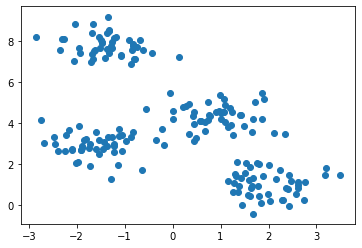

In [73]:
from sklearn.datasets.samples_generator import make_blobs
import matplotlib.pyplot as plt

# create a sample dataset with 300 data points and 4 cluster centers
X, y = make_blobs(n_samples=187, centers=4,
                          random_state=0, cluster_std=0.60)

# plot the data
plt.scatter(X[:, 0], X[:, 1])

In [74]:
from sklearn.cluster import KMeans

# k-means algorithm where k = 4
km = KMeans(n_clusters=4)
# perform k-means clustering on the previous dataset
km.fit(X)
# print the 4 cluster centers
print(km.cluster_centers_)

[[-1.59368697  2.90490507]
 [-1.36705878  7.771771  ]
 [ 0.91569884  4.32012489]
 [ 1.98180897  1.00394154]]


In [75]:
distances = {
    '0': 0,
    '1': 0,
    '2': 0,
    '3': 0
}
for p in X:
    p = [p]
    min_dist = [0, float("inf")]
    for i, c in enumerate(km.cluster_centers_):
        c = [c]
        dist = distance.cdist(p, c, 'euclidean')
        if dist < min_dist[1]:
            min_dist[0] = str(i)
            min_dist[1] = dist
            
    distances[min_dist[0]] += 1

In [76]:
distances

{'0': 46, '1': 46, '2': 48, '3': 47}

In [77]:
# Clustering sentences

In [78]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

sentences = ["This little kitty came to play when I was eating at a restaurant.",
             "Merley has the best squooshy kitten belly.",
             "Google Translate app is incredible.",
             "If you open 100 tab in google you get a smiley face.",
             "Best cat photo I've ever taken.",
             "Climbing ninja cat.",
             "Impressed with google map feedback.",
             "Key promoter extension for Google Chrome."]

In [81]:
vectorizer = CountVectorizer(stop_words='english')
W = vectorizer.fit_transform(sentences)
print(W.toarray())

[[0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0]
 [0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0]
 [1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0]
 [0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1]
 [0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0]]


In [86]:
from sklearn.cluster import KMeans

# k-means algorithm where k = 4
km = KMeans(n_clusters=2)
# perform k-means clustering on the previous dataset
km.fit(W)
# print the 4 cluster centers
print(km.cluster_centers_)

[[0.   0.   0.25 0.5  0.25 0.5  0.   0.25 0.25 0.   0.   0.   0.   0.
  0.   0.   0.25 0.25 0.25 0.   0.25 0.25 0.   0.25 0.25 0.   0.25 0.
  0.25 0.   0.25 0.   0.25]
 [0.25 0.25 0.   0.   0.   0.   0.25 0.   0.   0.25 0.25 0.25 1.   0.25
  0.25 0.25 0.   0.   0.   0.25 0.   0.   0.25 0.   0.   0.25 0.   0.25
  0.   0.25 0.   0.25 0.  ]]


In [87]:
km.labels_

array([0, 0, 1, 1, 0, 0, 1, 1], dtype=int32)

In [91]:
sentence_groups = {
    '0': list(),
    '1': list()
}

for i, group_num in enumerate(km.labels_):
    sentence_groups[str(group_num)].append(sentences[i])

In [92]:
clustered_words

array([1, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [93]:
sentence_groups

{'0': ['This little kitty came to play when I was eating at a restaurant.',
  'Merley has the best squooshy kitten belly.',
  "Best cat photo I've ever taken.",
  'Climbing ninja cat.'],
 '1': ['Google Translate app is incredible.',
  'If you open 100 tab in google you get a smiley face.',
  'Impressed with google map feedback.',
  'Key promoter extension for Google Chrome.']}